In [77]:
# Тема “Обучение без учителя”

In [78]:
    # Задание 1
# Импортируйте библиотеки pandas, numpy и matplotlib.
# Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
# Создайте датафреймы X и y из этих данных.
# Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, 
    # чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
# Масштабируйте данные с помощью StandardScaler.
# Постройте модель TSNE на тренировочный данных с параметрами:
    # n_components=2, learning_rate=250, random_state=42.
# Постройте диаграмму рассеяния на этих данных.

In [79]:
import numpy as np
import pandas as pd
import matplotlib as mpl

In [80]:
from sklearn.datasets import load_boston

In [81]:
ds = load_boston()

In [82]:
ds.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [83]:
ds['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [84]:
data = ds['data']
feature_names = ds["feature_names"]
target = ds['target']

In [85]:
type(data)

numpy.ndarray

In [86]:
X = pd.DataFrame(data, columns=feature_names)

In [87]:
y = pd.DataFrame(target, columns=["price"])

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
scaler = StandardScaler()
# type(scaler)

In [92]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [93]:
# X_train_scaled

In [94]:
from sklearn.manifold import TSNE

In [95]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [96]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [97]:
import matplotlib.pyplot as plt 

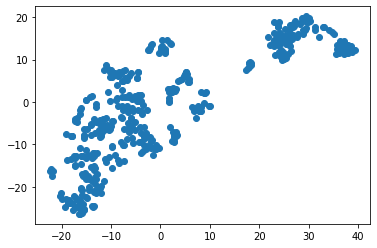

In [98]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

In [99]:
    # Задание 2
# С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
# Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
# Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.
# Вычислите средние значения price и CRIM в разных кластерах.

In [100]:
from sklearn.cluster import KMeans

In [101]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [102]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [103]:
# type(labels_train)  # numpy.ndarray

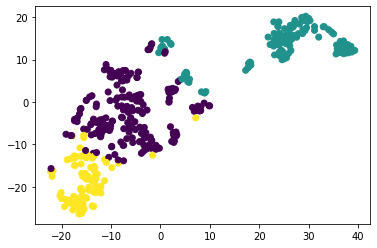

In [104]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [105]:
price_list_train = []
CRIM_list_train = []
for i in range(3):
  price_list_train.append(y_train[labels_train==i]['price'].values.mean())
  CRIM_list_train.append(X_train_scaled[labels_train==i]['CRIM'].values.mean())

print(price_list_train)
print(CRIM_list_train)

[24.958115183246072, 16.165354330708663, 27.78837209302326]
[-0.3595938819415387, 0.810903555051046, -0.39886418651917493]


In [106]:
    # *Задание 3
# Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
# Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [107]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

In [108]:
labels_test = kmeans.fit_predict(X_test_scaled)

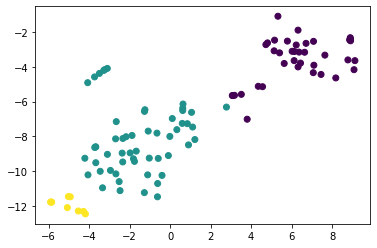

In [109]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()

In [110]:
price_list_test = []
CRIM_list_test = []
for i in range(3):
  price_list_test.append(y_test[labels_test==i]['price'].values.mean())
  CRIM_list_test.append(X_test_scaled[labels_test==i]['CRIM'].values.mean())

print(price_list_test)
print(CRIM_list_test)

[16.710526315789473, 22.690909090909095, 34.3111111111111]
[0.6554617566938616, -0.3824235029685067, -0.40257154189495115]
